### 特征数据如下

降水量、气温、湿球空气温度、露点空气温度、蒸气压、相对湿度、平均海平面压力、平均每小时风速、主要每小时风向、地区、站号、年、月、日

In [1]:
import pandas as pd
# 导入训练数据集及测试数据集
train_data = pd.read_csv('F:/DocumentFile/data/地区温度预测挑战赛公开数据/train.csv')
test_data = pd.read_csv('F:/DocumentFile/data/地区温度预测挑战赛公开数据/test.csv')
print("训练数据集：", train_data.shape, "测试数据集", test_data.shape)

训练数据集： (1244736, 14) 测试数据集 (17856, 13)


In [2]:
# 查看训练数据
train_data.head()

,降水量,气温,湿球空气温度,露点空气温度,蒸气压,相对湿度,平均海平面压力,平均每小时风速,主要每小时风向,地区,站号,年,月,日
0,0.0,1.4,0.8,-0.1,6.2,90.1,1016.3,NaN,NaN,0,0,2016,1,01 00:00:00
1,0.0,1.6,0.8,-0.7,6.0,85.0,1016.3,NaN,NaN,0,0,2016,1,01 01:00:00
2,0.0,-0.2,-0.5,-1.3,5.6,92.2,1016.4,NaN,NaN,0,0,2016,1,01 02:00:00
3,0.0,-0.5,-1.0,-1.3,5.7,95.0,1016.3,NaN,NaN,0,0,2016,1,01 03:00:00
4,0.0,-0.3,-0.5,-1.1,5.8,94.1,1016.2,NaN,NaN,0,0,2016,1,01 04:00:00


In [3]:
# 浏览数据的基本信息
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244736 entries, 0 to 1244735
Data columns (total 14 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   降水量      1244590 non-null  float64
 1   气温       1244509 non-null  float64
 2   湿球空气温度   1244433 non-null  float64
 3   露点空气温度   1244433 non-null  float64
 4   蒸气压      1244433 non-null  float64
 5   相对湿度     1244512 non-null  float64
 6   平均海平面压力  1244405 non-null  float64
 7   平均每小时风速  1140883 non-null  float64
 8   主要每小时风向  1140851 non-null  float64
 9   地区       1244736 non-null  int64  
 10  站号       1244736 non-null  int64  
 11  年        1244736 non-null  int64  
 12  月        1244736 non-null  int64  
 13  日        1244736 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 133.0+ MB


In [4]:
# 查看数据的基本统计信息
train_data.describe()

,降水量,气温,湿球空气温度,露点空气温度,蒸气压,相对湿度,平均海平面压力,平均每小时风速,主要每小时风向,地区,站号,年,月
count,1.244590e+06,1.244509e+06,1.244433e+06,1.244433e+06,1.244433e+06,1.244512e+06,1.244405e+06,1.140883e+06,1.140851e+06,1.244736e+06,1.244736e+06,1.244736e+06,1.244736e+06
mean,1.260558e-01,1.031931e+01,8.941366e+00,7.454480e+00,1.079686e+01,8.315449e+01,1.013460e+03,9.416619e+00,2.037387e+02,6.208333e+00,1.150000e+01,2.018464e+03,6.443313e+00
std,4.762011e-01,4.769695e+00,4.411332e+00,4.523327e+00,3.239149e+00,1.191142e+01,1.247816e+01,5.776643e+00,8.677642e+01,4.112778e+00,6.922189e+00,1.693743e+00,3.410204e+00
min,0.000000e+00,-7.700000e+00,-4.970000e+01,-1.460000e+01,2.000000e+00,2.000000e+01,9.567000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00
25%,0.000000e+00,7.000000e+00,5.900000e+00,4.100000e+00,8.200000e+00,7.610000e+01,1.005900e+03,5.000000e+00,1.400000e+02,3.750000e+00,5.750000e+00,2.017000e+03,3.000000e+00
50%,0.000000e+00,1.040000e+01,9.100000e+00,7.600000e+00,1.050000e+01,8.600000e+01,1.015100e+03,8.000000e+00,2.100000e+02,6.500000e+00,1.150000e+01,2.018000e+03,6.000000e+00
75%,0.000000e+00,1.380000e+01,1.220000e+01,1.080000e+01,1.300000e+01,9.220000e+01,1.022100e+03,1.200000e+01,2.700000e+02,9.250000e+00,1.725000e+01,2.020000e+03,9.000000e+00
max,3.400000e+01,3.160000e+01,2.400000e+01,2.270000e+01,2.730000e+01,1.002000e+02,1.051300e+03,5.900000e+01,3.600000e+02,1.400000e+01,2.300000e+01,2.021000e+03,1.200000e+01


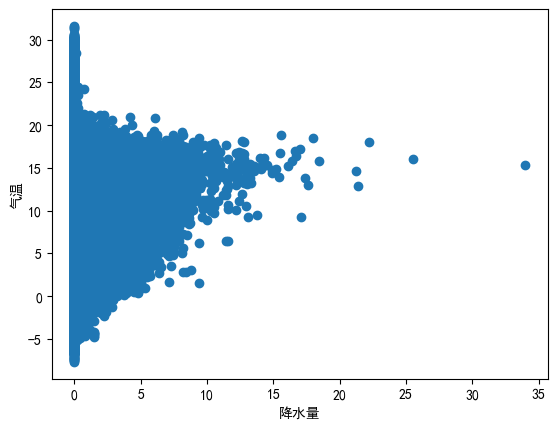

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# 查看降水量与温度的关系
Precipitation_Temperature = train_data[['降水量', '气温']]
plt.scatter(Precipitation_Temperature['降水量'], Precipitation_Temperature['气温'])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('降水量')
plt.ylabel('气温')
plt.show()

**单从降水量和温度关系来看，无法准确知道其相应关系，因为在无降水量时，温度的跨度太大，还需要结合其他特征分析。**

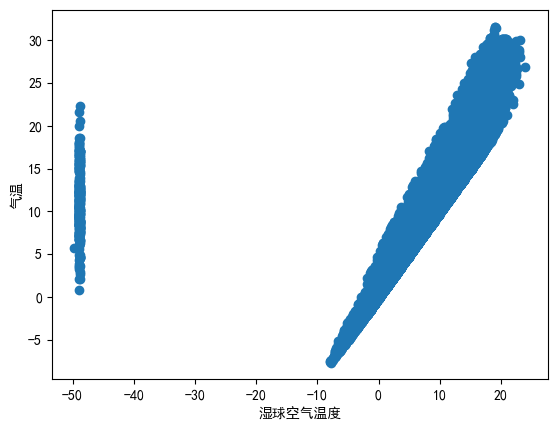

In [6]:
# 查看湿球空气温度与温度的关系
Wet_bulb_Temperature = train_data[['湿球空气温度', '气温']]
plt.scatter(Wet_bulb_Temperature['湿球空气温度'], Wet_bulb_Temperature['气温'])
plt.xlabel('湿球空气温度')
plt.ylabel('气温')
plt.show()

**可以看出当湿球空气温度>-10时，与气温成正比的线性关系。**

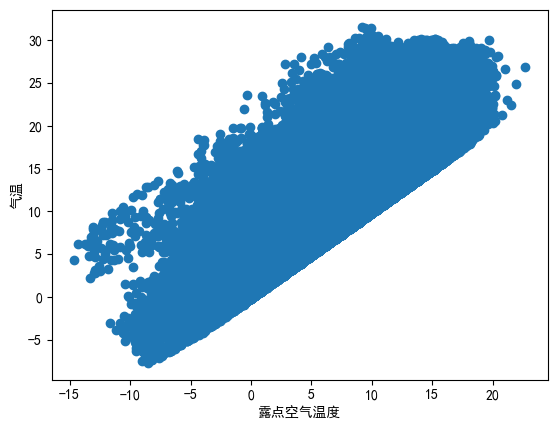

In [7]:
# 查看露点空气温度与温度的关系
Dew_Point_Temperature = train_data[['露点空气温度', '气温']]
plt.scatter(Dew_Point_Temperature['露点空气温度'], Dew_Point_Temperature['气温'])
plt.xlabel('露点空气温度')
plt.ylabel('气温')
plt.show()

**可以看出露点空气温度和气温成正比的线性关系。**

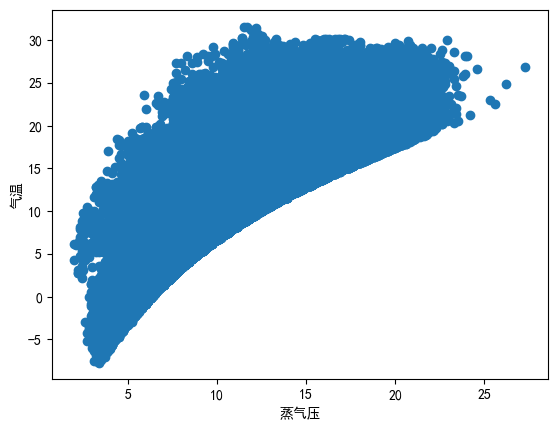

In [8]:
# 查看蒸气压与温度的关系
Vapor_Pressure_Temperature = train_data[['蒸气压', '气温']]
plt.scatter(Vapor_Pressure_Temperature['蒸气压'], Vapor_Pressure_Temperature['气温'])
plt.xlabel('蒸气压')
plt.ylabel('气温')
plt.show()

**可以看出蒸气压和气温成正比的线性关系。**

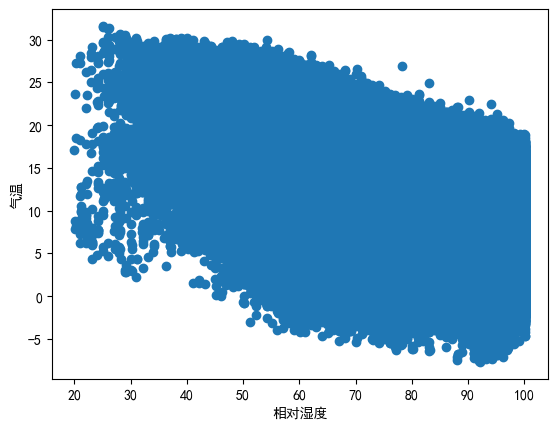

In [9]:
# 查看相对湿度与温度的关系
Relative_Humidity_Temperature = train_data[['相对湿度', '气温']]
plt.scatter(Relative_Humidity_Temperature['相对湿度'], Relative_Humidity_Temperature['气温'])
plt.xlabel('相对湿度')
plt.ylabel('气温')
plt.show()

**可以看出相对湿度和气温成反比的线性关系。**

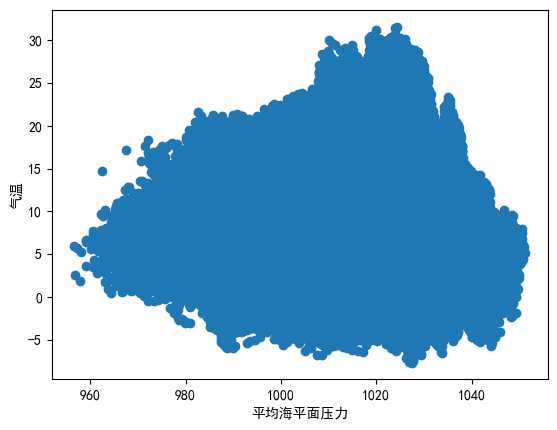

In [10]:
# 查看平均画面压力与温度的关系
Mean_Sea_Pressure_Temperature = train_data[['平均海平面压力', '气温']]
plt.scatter(Mean_Sea_Pressure_Temperature['平均海平面压力'], Mean_Sea_Pressure_Temperature['气温'])
plt.xlabel('平均海平面压力')
plt.ylabel('气温')
plt.show()

**可以看平均海平面压力与气温的关系很想正态分布，在1010-1030达到峰值。**

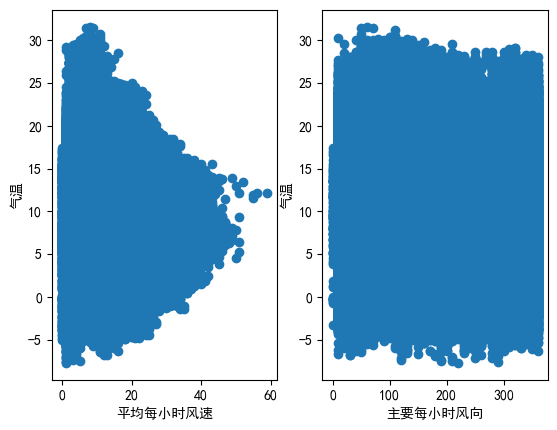

In [11]:
# 查看平均每小时风速及主要每小时风向和气温的关系
Mean_Wind_Speed_Temperature = train_data[['平均每小时风速', '气温']]
Main_Wind_Direction_Temperature = train_data[['主要每小时风向', '气温']]
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1)
plt.scatter(Mean_Wind_Speed_Temperature['平均每小时风速'], Mean_Wind_Speed_Temperature['气温'])
plt.xlabel('平均每小时风速')
plt.ylabel('气温')
ax2 = fig1.add_subplot(1, 2, 2)
plt.scatter(Main_Wind_Direction_Temperature['主要每小时风向'], Main_Wind_Direction_Temperature['气温'])
plt.xlabel('主要每小时风向')
plt.ylabel('气温')
plt.show()

**平均每小时风速和气温的关系和降水量与气温的关系颇为相似，单看风向没找到什么关系，应该还要结合其他特征。**

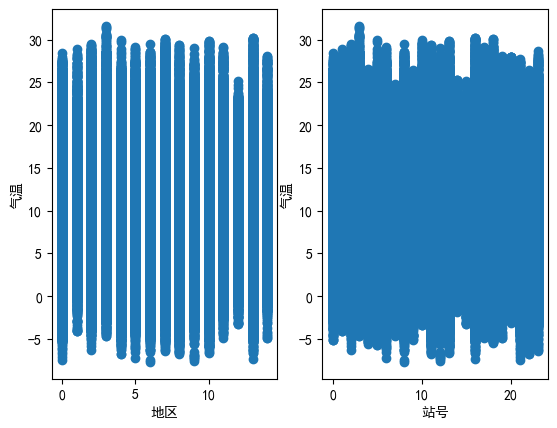

In [12]:
# 查看地区和站号与气温的关系
Region_Temperature = train_data[['地区', '气温']]
Station_NUN_Temperature = train_data[['站号', '气温']]
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1)
plt.scatter(Region_Temperature['地区'], Region_Temperature['气温'])
plt.xlabel('地区')
plt.ylabel('气温')
ax2 = fig1.add_subplot(1, 2, 2)
plt.scatter(Station_NUN_Temperature['站号'], Station_NUN_Temperature['气温'])
plt.xlabel('站号')
plt.ylabel('气温')
plt.show()

**数据倾向于均匀分布。**

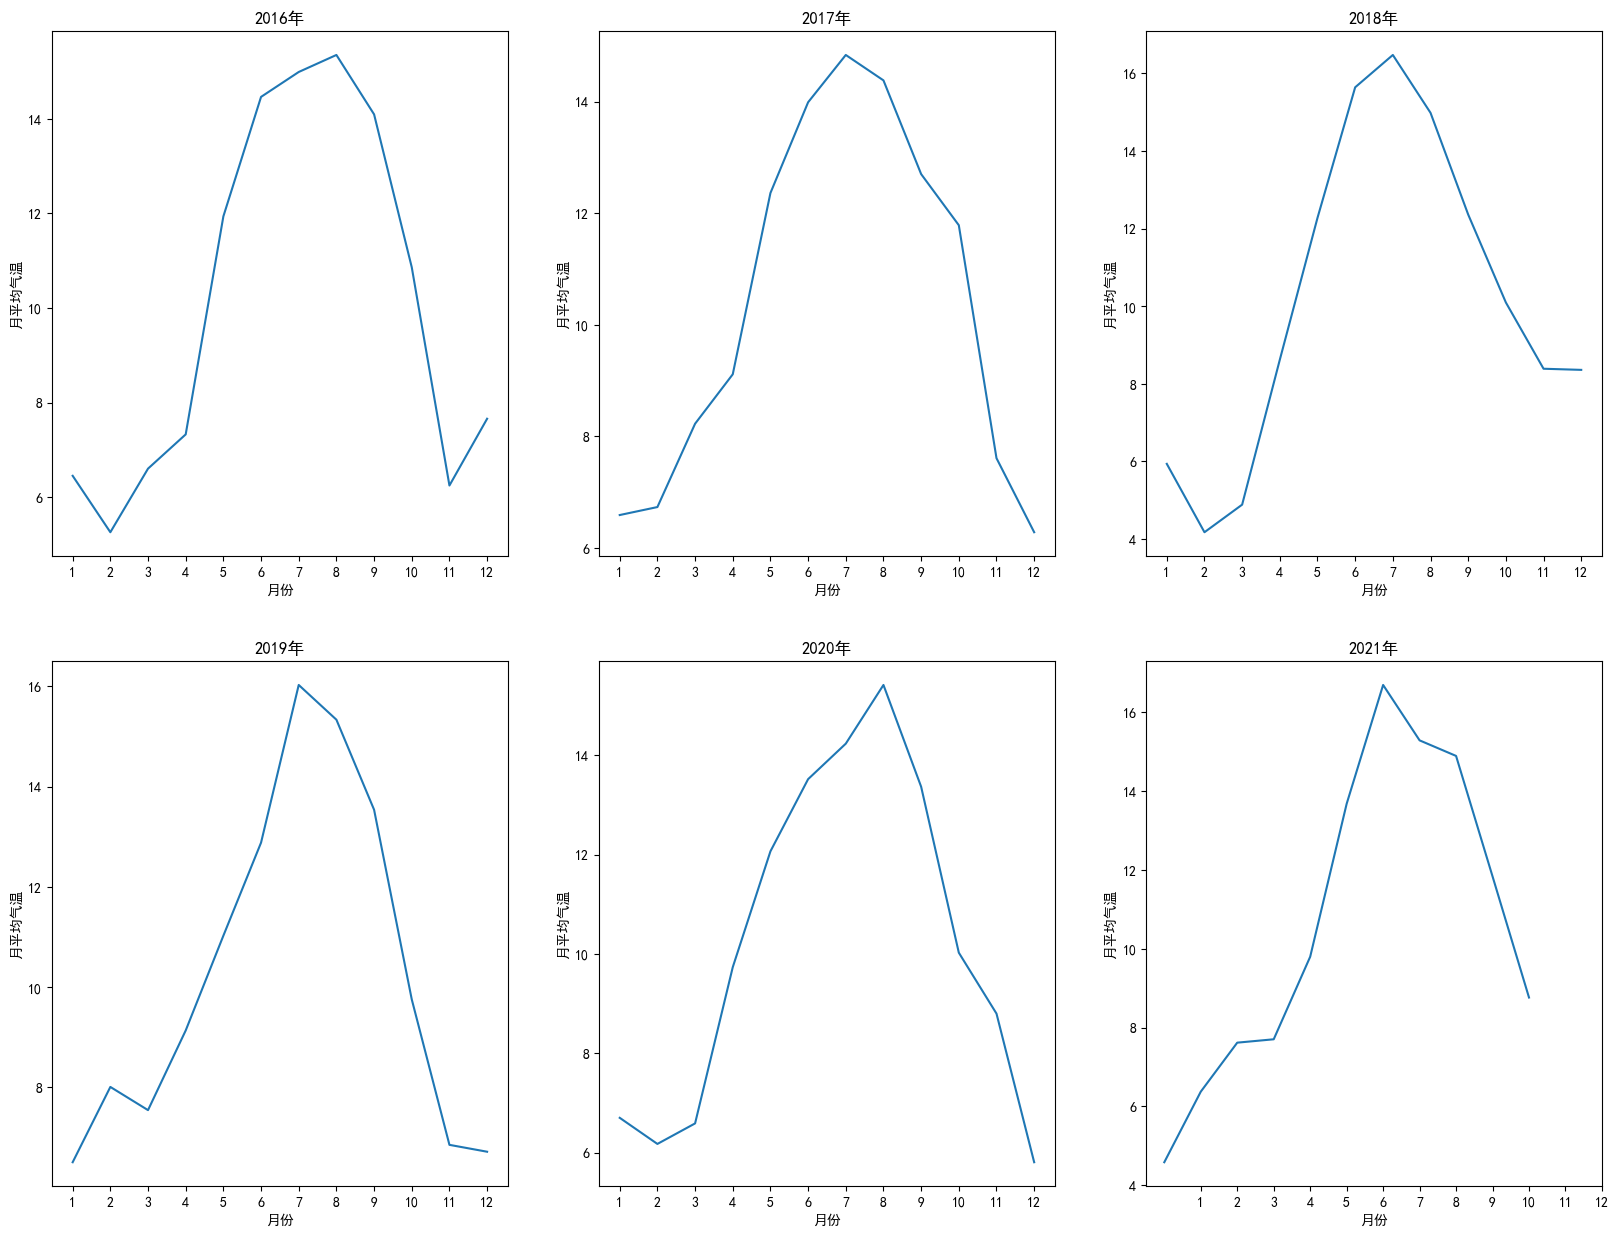

In [13]:
# 先简单查看年月与气温的关系
Year_Month_Temperature = train_data.groupby(['年', '月'], as_index=False)['气温'].apply(np.mean)
fig1 = plt.figure(figsize=(20, 15))
for i in range(5):
    ax1 = fig1.add_subplot(2, 3, i+1)
    month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    plt.plot(month, Year_Month_Temperature[Year_Month_Temperature['年'] == 2016+i]['气温'])
    plt.xticks([x+1 for x in range(12)])
    plt.xlabel("月份")
    plt.ylabel("月平均气温")
    plt.title(str(2016+i)+"年")
ax2 = fig1.add_subplot(2, 3, 6)
plt.plot(range(11), Year_Month_Temperature[Year_Month_Temperature['年'] == 2021]['气温'])
plt.xticks([x+1 for x in range(12)])
plt.xlabel("月份")
plt.ylabel("月平均气温")
plt.title(str(2021)+"年")
plt.show()

**此处显示不同年份每个月的平均气温，可以明显看出每年的气温符合正态分布，6-8月达到峰值。**

In [14]:
# 在合并数据前先将train数据集中缺失的（气温）属性用均值填充
train_data['气温'] = train_data['气温'].fillna(train_data['气温'].mean())

In [15]:
# 数据预处理
# 合并数据集，方便同时对两个数据集进行清洗
full = pd.concat([train_data, test_data], axis=0, ignore_index=True)
full.shape

(1262592, 14)

In [16]:
# 关系矩阵
corr_df = train_data.corr()
print(corr_df['气温'].sort_values())

相对湿度      -0.298422
站号        -0.037310
地区        -0.013023
降水量       -0.009451
主要每小时风向    0.005607
年          0.022074
平均每小时风速    0.049276
平均海平面压力    0.102858
月          0.239237
蒸气压        0.860704
露点空气温度     0.871493
湿球空气温度     0.951357
气温         1.000000
Name: 气温, dtype: float64


In [17]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262592 entries, 0 to 1262591
Data columns (total 14 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   降水量      1262446 non-null  float64
 1   气温       1244736 non-null  float64
 2   湿球空气温度   1262289 non-null  float64
 3   露点空气温度   1262289 non-null  float64
 4   蒸气压      1262289 non-null  float64
 5   相对湿度     1262368 non-null  float64
 6   平均海平面压力  1262261 non-null  float64
 7   平均每小时风速  1157251 non-null  float64
 8   主要每小时风向  1157219 non-null  float64
 9   地区       1262592 non-null  int64  
 10  站号       1262592 non-null  int64  
 11  年        1262592 non-null  int64  
 12  月        1262592 non-null  int64  
 13  日        1262592 non-null  object 
dtypes: float64(9), int64(4), object(1)
memory usage: 134.9+ MB


In [18]:
# 因为风速和风向与气温的关系系数较低且缺失值较多，先删除掉这两个特征属性
full.drop(['平均每小时风速', '主要每小时风向'], axis=1, inplace=True)
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262592 entries, 0 to 1262591
Data columns (total 12 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   降水量      1262446 non-null  float64
 1   气温       1244736 non-null  float64
 2   湿球空气温度   1262289 non-null  float64
 3   露点空气温度   1262289 non-null  float64
 4   蒸气压      1262289 non-null  float64
 5   相对湿度     1262368 non-null  float64
 6   平均海平面压力  1262261 non-null  float64
 7   地区       1262592 non-null  int64  
 8   站号       1262592 non-null  int64  
 9   年        1262592 non-null  int64  
 10  月        1262592 non-null  int64  
 11  日        1262592 non-null  object 
dtypes: float64(7), int64(4), object(1)
memory usage: 115.6+ MB


In [19]:
# 属性（降水量、气温、湿球空气温度、露点空气温度、相对湿度、平均海平面压力、蒸气压）都有少量缺失值，采用均值填充
cols = ['降水量', '湿球空气温度', '露点空气温度', '相对湿度', '平均海平面压力', '蒸气压']
for col in cols:
    full[col] = full[col].fillna(full[col].mean())

In [20]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262592 entries, 0 to 1262591
Data columns (total 12 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   降水量      1262592 non-null  float64
 1   气温       1244736 non-null  float64
 2   湿球空气温度   1262592 non-null  float64
 3   露点空气温度   1262592 non-null  float64
 4   蒸气压      1262592 non-null  float64
 5   相对湿度     1262592 non-null  float64
 6   平均海平面压力  1262592 non-null  float64
 7   地区       1262592 non-null  int64  
 8   站号       1262592 non-null  int64  
 9   年        1262592 non-null  int64  
 10  月        1262592 non-null  int64  
 11  日        1262592 non-null  object 
dtypes: float64(7), int64(4), object(1)
memory usage: 115.6+ MB


In [21]:
# 特征工程
# 属性（降水量、湿球空气温度、露点空气温度、相对湿度、平均海平面压力、蒸气压）都是连续数值，需要规范化
from sklearn import preprocessing
numeric_cols = ['降水量',  '湿球空气温度', '露点空气温度', '相对湿度', '平均海平面压力', '蒸气压']
scaler = preprocessing.StandardScaler()
full_standar = scaler.fit_transform(full[numeric_cols])
full_front = pd.DataFrame(full_standar, columns=numeric_cols)
full_front.head()

,降水量,湿球空气温度,露点空气温度,相对湿度,平均海平面压力,蒸气压
0,-0.265428,-1.844141,-1.669931,0.578319,0.231388,-1.417964
1,-0.265428,-1.844141,-1.802961,0.149109,0.231388,-1.479907
2,-0.265428,-2.139672,-1.935991,0.755053,0.239361,-1.603791
3,-0.265428,-2.253337,-1.935991,0.990697,0.231388,-1.572820
4,-0.265428,-2.139672,-1.891647,0.914955,0.223415,-1.541849


In [22]:
# 属性（地区、站号）绑定在一起
Location_Number = full[['地区', '站号']].copy()
Location_Number['地区0-站号0'] = [1 if i == 0 and j == 0 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区0-站号4'] = [1 if i == 0 and j == 4 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区0-站号21'] = [1 if i == 0 and j == 21 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区1-站号1'] = [1 if i == 1 and j == 1 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区2-站号2'] = [1 if i == 2 and j == 2 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区3-站号3'] = [1 if i == 3 and j == 3 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区4-站号5'] = [1 if i == 4 and j == 5 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区4-站号7'] = [1 if i == 4 and j == 7 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区4-站号9'] = [1 if i == 4 and j == 9 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区4-站号22'] = [1 if i == 4 and j == 22 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区5-站号6'] = [1 if i == 5 and j == 6 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区6-站号8'] = [1 if i == 6 and j == 8 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区7-站号110'] = [1 if i == 7 and j == 10 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区7-站号18'] = [1 if i == 7 and j == 18 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区7-站号20'] = [1 if i == 7 and j == 20 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区7-站号23'] = [1 if i == 7 and j == 23 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区8-站号11'] = [1 if i == 8 and j == 11 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区9-站号12'] = [1 if i == 9 and j == 12 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区10-站号13'] = [1 if i == 10 and j == 13 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区11-站号14'] = [1 if i == 11 and j == 14 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区11-站号17'] = [1 if i == 11 and j == 17 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区12-站号15'] = [1 if i == 12 and j == 15 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区13-站号16'] = [1 if i == 13 and j == 16 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
Location_Number['地区14-站号19'] = [1 if i == 14 and j == 19 else 0 for i, j in
                              zip(Location_Number['地区'], Location_Number['站号'])]
full_location = Location_Number.drop(['地区', '站号'], axis=1)
full_location

,地区0-站号0,地区0-站号4,地区0-站号21,地区1-站号1,地区2-站号2,地区3-站号3,地区4-站号5,地区4-站号7,地区4-站号9,地区4-站号22,...,地区7-站号20,地区7-站号23,地区8-站号11,地区9-站号12,地区10-站号13,地区11-站号14,地区11-站号17,地区12-站号15,地区13-站号16,地区14-站号19
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262587,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1262588,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1262589,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1262590,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
# 属性（年，月，日）
Date_df = full[['年', '月', '日']].copy()
Date_df['日期'] = Date_df['年'].map(str)+"-"+Date_df['月'].map(str)+"-"+Date_df['日'].map(lambda x: x.split(" ")[0])+ " "+Date_df['日'].map(lambda x: x.split(" ")[1])
Date_df['日期'] = pd.to_datetime(Date_df['日期'])
Date_df

,年,月,日,日期
0,2016,1,01 00:00:00,2016-01-01 00:00:00
1,2016,1,01 01:00:00,2016-01-01 01:00:00
2,2016,1,01 02:00:00,2016-01-01 02:00:00
3,2016,1,01 03:00:00,2016-01-01 03:00:00
4,2016,1,01 04:00:00,2016-01-01 04:00:00
...,...,...,...,...
1262587,2021,12,31 19:00:00,2021-12-31 19:00:00
1262588,2021,12,31 20:00:00,2021-12-31 20:00:00
1262589,2021,12,31 21:00:00,2021-12-31 21:00:00
1262590,2021,12,31 22:00:00,2021-12-31 22:00:00


In [24]:
year_df = pd.get_dummies(Date_df['年'])
month_df = pd.get_dummies(Date_df['月'])
day_df = pd.get_dummies(Date_df['日'].map(lambda x: x.split(" ")[0]))
hour_df = Date_df['日期'].dt.hour
# 将每天的时间分组
# 黎明：2:00-5:59、上午：6:00-10:59、中午：11:00-13:59、下午：14:00-17:59、晚上：18:00-21:59、午夜：22:00-1:59
def daypart(hour):
    if hour in [2, 3, 4, 5]:
        return "down"
    elif hour in [6, 7, 8, 9, 10]:
        return "morning"
    elif hour in [11, 12, 13]:
        return "noon"
    elif hour in [14, 15, 16, 17]:
        return "afternoon"
    elif hour in [18, 19, 20, 21]:
        return "evening"
    else:
        return "midnight"
hour_df = hour_df.apply(daypart)
hour_df = pd.get_dummies(hour_df)
full_datetime = pd.concat([year_df, month_df, day_df, hour_df], axis=1)
full_datetime

,2016,2017,2018,2019,2020,2021,1,2,3,4,...,28,29,30,31,afternoon,down,evening,midnight,morning,noon
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262587,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1262588,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1262589,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1262590,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [25]:
# 合并最后想要的数据集
full_all = pd.concat([full_front, full_location, full_datetime], axis=1)
full_all

,降水量,湿球空气温度,露点空气温度,相对湿度,平均海平面压力,蒸气压,地区0-站号0,地区0-站号4,地区0-站号21,地区1-站号1,...,28,29,30,31,afternoon,down,evening,midnight,morning,noon
0,-0.265428,-1.844141,-1.669931,0.578319,0.231388,-1.417964,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.265428,-1.844141,-1.802961,0.149109,0.231388,-1.479907,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.265428,-2.139672,-1.935991,0.755053,0.239361,-1.603791,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.265428,-2.253337,-1.935991,0.990697,0.231388,-1.572820,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-0.265428,-2.139672,-1.891647,0.914955,0.223415,-1.541849,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262587,-0.265428,0.383703,0.658094,1.074856,-0.605780,0.533221,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1262588,-0.265428,0.383703,0.635923,1.007529,-0.677538,0.502250,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1262589,0.154004,0.474635,0.768953,1.074856,-0.757268,0.719048,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1262590,-0.055712,0.633767,0.857639,1.251590,-0.852944,0.811961,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [26]:
# 建立训练数据集和测试数据集
from sklearn.model_selection import train_test_split
source_X = full_all.loc[0:1244735, :]
source_y = full.loc[0:1244735, '气温']
pred_X = full_all.loc[1244736:, :]
train_X, test_X, train_y, test_y = train_test_split(source_X, source_y, train_size=0.8, random_state=0)
print('原始数据集特征：', source_X.shape, '训练数据集特征：', train_X.shape, '测试数据集特征：', test_X.shape)
print('原始数据集标签：', source_y.shape, '训练数据集标签：', train_y.shape, '测试数据集标签：', test_y.shape)

原始数据集特征： (1244736, 85) 训练数据集特征： (995788, 85) 测试数据集特征： (248948, 85)
原始数据集标签： (1244736,) 训练数据集标签： (995788,) 测试数据集标签： (248948,)


In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
# # 随机森林
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = "1"
# rfr=RandomForestRegressor(random_state=0)
# # params={'n_estimators':[50,100,150,200,250],'max_depth':[1,3,5,7,9,11,13,15,17,19],'min_samples_leaf':[2,4,6]}
# params={'n_estimators':[20,30,40,50,60]}
# best_model=GridSearchCV(rfr,param_grid=params,refit=True,cv=5).fit(train_X, train_y)
# print('best parameters:',best_model.best_params_)

In [29]:
# 随机森林
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "1"
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(random_state=0, n_estimators=200)
clf = clf.fit(train_X, train_y)
clf.score(test_X, test_y)

0.999366805329574

In [35]:
pred_y = clf.predict(pred_X)
location = test_data['站号']
date = test_data['日']
pred_df = pd.DataFrame({
    '站号': location,
    '日': date,
    '气温': pred_y
})
pred_df.head()

,站号,日,气温
0,0,01 00:00:00,8.7540
1,0,01 01:00:00,7.8380
2,0,01 02:00:00,7.7085
3,0,01 03:00:00,7.3510
4,0,01 04:00:00,6.5895


In [36]:
# 保存结果
pred_df.to_csv('F:/DocumentFile/data/地区温度预测挑战赛公开数据/pred4.csv', index=False)

In [32]:
# # Gradient Boosting算法
# from sklearn import ensemble
# # 定义模型参数进行训练
# params = {
#     "n_estimators": 500,
#     "max_depth": 4,
#     "min_samples_split": 5,
#     "learning_rate": 0.01,
# }
# reg = ensemble.GradientBoostingRegressor(**params)
# reg.fit(train_X, train_y)
# reg.score(test_X, test_y)

In [33]:
# pred2_y = reg.predict(pred_X)
# location = test_data['站号']
# date = test_data['日']
# pred2_df = pd.DataFrame({
#     '站号': location,
#     '日': date,
#     '气温': pred2_y
# })

In [34]:
# # 保存结果
# pred2_df.to_csv('F:/DocumentFile/data/地区温度预测挑战赛公开数据/pred2.csv', index=False)